# Домашнее задание №5

Задание выполнил(а): `Кирилл Сетдеков`

### Общая информация

__Дата выдачи:__ 25.06.2021

__Дедлайн:__ 04.07.2021 23:30



### О задании

Часть 1 содержит практическое задание на применение методов KMeans и DBSCAN.

Часть 2 содержит практическое задание на реализацию метода KMeans.

Часть 3 содержит практическое задание на снижение размерности с помощью PCA и кластеризацию табличных данных.


### Оценивание и штрафы


#### 1. k-means and DBSCAN на картинках [4 балла]
* [Задание 1](#task1) [2 балла]
* [Задание 2](#task2) [1 балл]
* [Задание 3](#task3) [1 балл]

#### 2. k-means своими руками [4 балла]
* [Задание 1](#task2_1) [1 балл]
* [Задание 2](#task2_2) [3 балла]

#### 3. PCA + кластеризация [6 баллов]
* [Задание 1](#task3_1) [1 балл]
* [Задание 2](#task3_2) [1 балл]
* [Задание 3](#task3_3) [1 балл]
* [Задание 4](#task3_4) [1 балл]
* [Задание 5](#task3_5) [2 балла]

Итоговая оценка за домашнюю работу вычисляется по формуле: $$s \cdot \frac{10}{14},$$ где $s$ - сумма набранных балов. 

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.25 балла в день (от оценки в 10 бальной шкале), но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/course/811). 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = (8, 5)
%matplotlib inline

# Часть 1. Кластеризация цифр.

В этом задании вам нужно будет кластеризовать изображения цифр. В данном случае одна картинка - это один объект (признаков столько, сколько на картинке пикселей).

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
digits = digits["data"]

Число объектов и признаков:

In [5]:
digits.shape

(1797, 64)

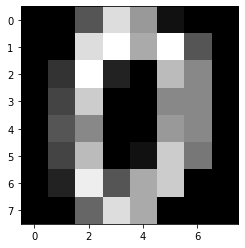

In [6]:
# Каждый объект - изображение цифры размеров 8 x 8
plt.imshow(digits[0].reshape(8, 8), cmap="gray")
plt.show()

In [7]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

### Задание 1 [2 балла] <a id="task1"></a>

Кластеризуйте цифры методами кластеризации k-means ([`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)) и DBSCAN ([`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)). Измерьте качество кластеризации с помощью метрики Silhouette Coefficient ([`sklearn.metrics.silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)).

In [8]:
# kmeans
kmeans_obj = KMeans(n_clusters=10)
kmeans_res = kmeans_obj.fit_predict(digits)
kmeans_silcoef = silhouette_score(digits, kmeans_res)

# dbscan
dbscan_obj = DBSCAN().fit(digits)
dbscan_res = kmeans_obj.predict(digits)
dbscan_silcoef = silhouette_score(digits, dbscan_res)

print(f'Методом k-means с базовыми настройками и 10 кластерами поулчилось Silhouette Coefficient: {kmeans_silcoef:.4f}')
print(f'Методом DBSCAN с базовыми настройками поулчилось Silhouette Coefficient: {dbscan_silcoef:.4f}')



Методом k-means с базовыми настройками и 10 кластерами поулчилось Silhouette Coefficient: 0.1825
Методом DBSCAN с базовыми настройками поулчилось Silhouette Coefficient: 0.1825


Попробуем применить методы для PCA для этих чисел, посмотрим, что получится:

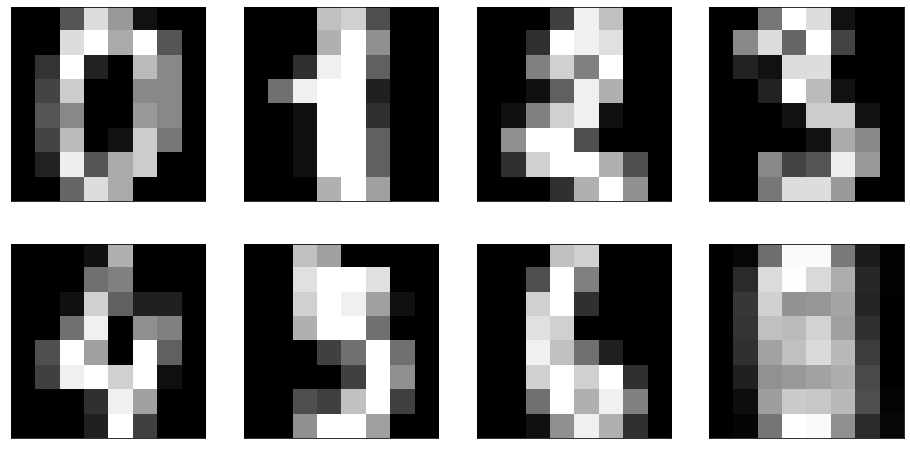

In [9]:

image_shape = (8, 8)
    
mean_digit = digits.mean(axis=0)

plt.figure(figsize=(16, 8))
rows, cols = 2, 4
n_samples = rows * cols
for i in range(n_samples - 1):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(digits[i, :].reshape(image_shape), interpolation='none',
               cmap='gray')
    plt.xticks(())
    plt.yticks(())
    
plt.subplot(rows, cols, n_samples)
plt.imshow(mean_digit.reshape(image_shape), interpolation='none',
           cmap='gray')
plt.xticks(())
_ = plt.yticks(())

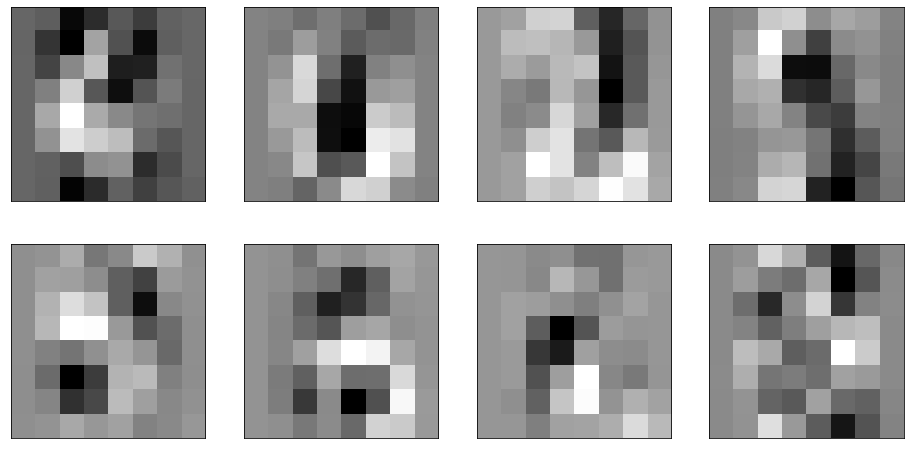

In [10]:
from sklearn.decomposition import PCA

red = PCA()
delta_digits = digits - mean_digit
red.fit(delta_digits)

plt.figure(figsize=(16, 8))
rows, cols = 2, 4
n_samples = rows * cols
for i in range(n_samples):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(red.components_[i, :].reshape(image_shape), interpolation='none',
               cmap='gray')
    plt.xticks(())
    plt.yticks(())

In [11]:
pca_tr_digits = red.transform(delta_digits)[:,:1]

kmeanspca_obj = KMeans(n_clusters=10)
kmeanspca_res = kmeanspca_obj.fit_predict(pca_tr_digits)
kmeasn_pcass = silhouette_score(pca_tr_digits, kmeanspca_res)
print(f'Методом k-means на первой главной компоненте и 10 кластерами поулчилось Silhouette Coefficient: {kmeasn_pcass:.4f}')


Методом k-means на первой главной компоненте и 10 кластерами поулчилось Silhouette Coefficient: 0.5314


На главных компонентах, построенных на разнице числа от среднего изображения работает значительно лучше

### Задание 2 [1 балл] <a id="task2"></a>

Для кластеризации методом k-means визуализируйте картинки - центры кластеров (метод `.cluster_centers_` у KMeans).

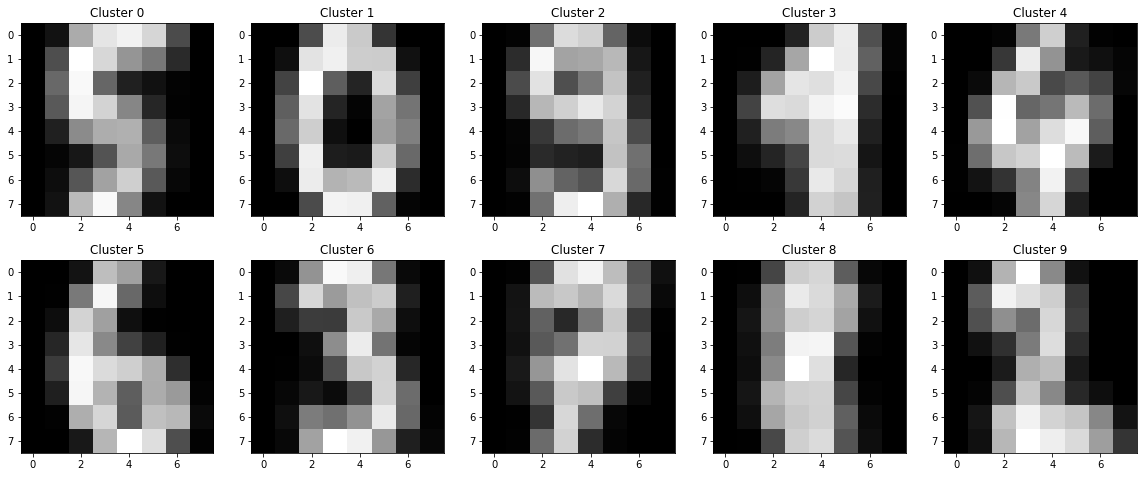

In [12]:
plt.figure(figsize=(20, 8))
rows, cols = 2, 5

for i in range(10):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(kmeans_obj.cluster_centers_[i, :].reshape(image_shape), interpolation='none',
               cmap='gray')
    plt.title(f'Cluster {i}')
           
    # plt.xticks(())
    # plt.yticks(())

С 10 кластерами, выглядит, что центры их соответствуют цифрам, но есть сомнения относительно 8, 1 и 0.

### Задание 3 [1 балл] <a id="task3"></a>

Для кластеризации методом DBSCAN выведите три случайно выбранные картинки из каждого кластера.

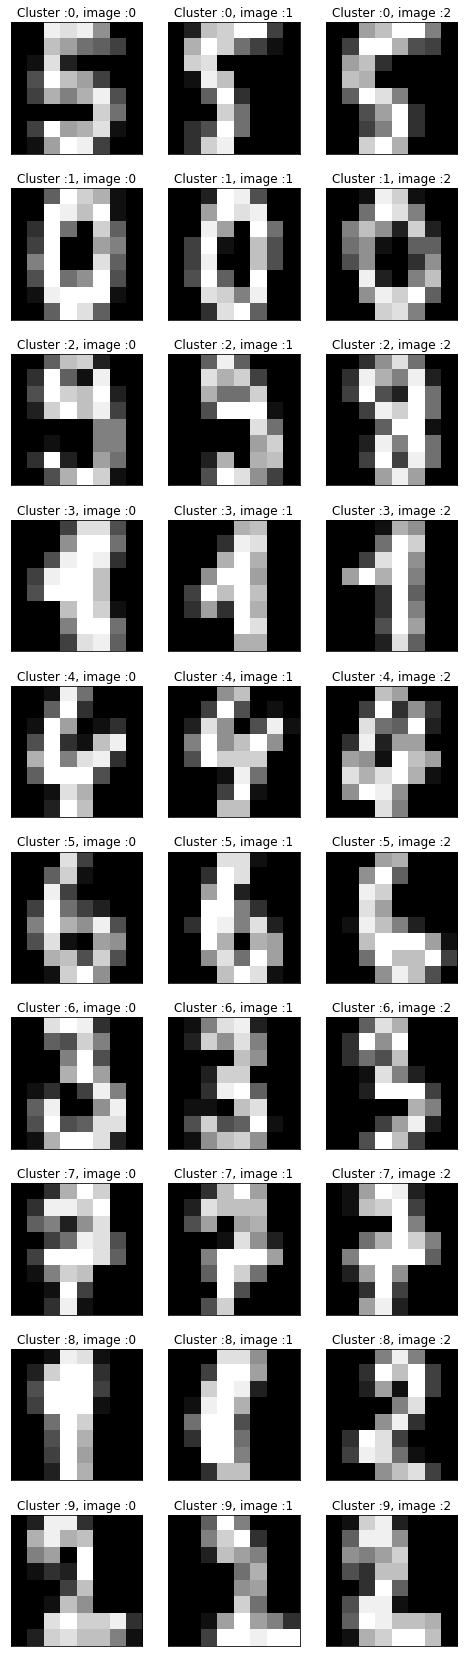

In [13]:
plt.figure(figsize=(8, 30))
rows, cols = len(set(dbscan_res)), 3

for i in set(dbscan_res):

    this_digit = digits[dbscan_res == i]
    random_idx = np.random.choice(len(this_digit), size=3)
    random_digits = this_digit[random_idx, :].reshape(-1, 8, 8)
    for k, d in enumerate(random_digits):
        plt.subplot(rows, cols, k + 3*i + 1)
        plt.imshow(d,interpolation='none', cmap='gray')
        plt.title(f'Cluster :{i}, image :{k}')
        plt.xticks(())
        plt.yticks(())


# Часть 2. K-means своими руками

В этом задании вам нужно будет реализовать алгоритм K-Means. Для этого потребуется:

- следовать инструкциям
- воспользоваться базовыми техниками `numpy`
- понимание, что происходит в алгоритме K-Means

Сгенерируем случайную выборку. Матрица объекты-признаки находится в переменной $X$.

In [14]:
np.random.seed(13)
X1 = np.random.randn(100,2)
X2 = np.random.randn(100,2) - np.array([10,1])
X3 = np.random.randn(100,2) - np.array([1,10])
X = np.vstack((X1,X2,X3))

Визуализируем выборку:

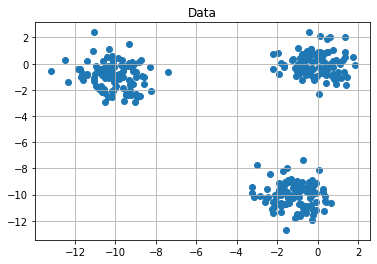

In [15]:
plt.scatter(X[:,0], X[:,1])
plt.title('Data')
plt.grid();

### Задание 1 [1 балл] <a id="task2_1"></a>

Чтобы реализовать алгоритм K-Means, нам понадобится вспомогательная функция. В процессе работы алгоритма мы все время обновляем значение целевой переменной для каждого объекта - то есть на каждом шаге вычисляем, к какому кластеру он относится. На каждом шаге нам известно, где находятся центры кластеров, так что задача - для каждого объекта посчитать расстояние до центров кластеров и выбрать ближайший из них в качестве ответа.

На практике это удобно сделать с помощью функции [`sklearn.metrics.pairwise_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html). Она может принимать на вход два массива $X$ и $Y$, а на выходе предоставить матрицу расстояний, где в $i$-ой строке и $j$-ом столбце стоит расстояние между $i$-ым объектом в $X$ и $j$-ым объектом в $Y$.

Не воспрещается и реализовать это как-то по-другому.

Также в процессе вам возможно понадобится функция `np.argmin` (не забудьте про параметр `axis`!).

In [16]:
from sklearn.metrics import pairwise_distances, pairwise_distances_argmin

In [17]:
def compute_clusters(X, centers):
    """
    INPUT:
    X - np.array, (n_objects x n_features) - матрица объекты-признаки
    centers - np.array, (n_clusters x n_features) - матрица, содержащая координаты центров кластеров
    
    OUTPUT:
    y - np.array, (n_objects,) - вектор, состоящий из меток кластеров (0, 1, ..., n_clusters-1), где
    на i-ом месте стоит метка кластера для i-ого объекта выборки X
    """
    # y = pairwise_distances_argmin(X, centers) # 448 µs ± 3.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each) хотя пишут в документации, что на больших таблицах будет лучше
    y = pairwise_distances(X, Y=centers).argmin(axis=1) # на нашем примере это работает быстрее 266 µs ± 2.44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each) 
    return y

In [18]:
# check yourself
centers = (np.arange(6)*0.05).reshape(3, 2)
assert np.allclose(
    compute_clusters(X, centers), 
    np.array([0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
)

### Задание 2 [3 балла] <a id="task2_2"></a>

Реализуйте класс KMeans, обладающий методами `fit` (находит оптимальные центры кластеров) и `transform` (вычисляет, к какому кластеру относятся каждый объект выборки).

Метод `fit`:

1. Посчитайте, сколько объектов и признаков есть в выборке. **(0.33 балла)**
2. Инициализируйте $y$ - вектор длины `n_objects` (число объектов в выборке $X$), хранящий изначальные метки кластеров для объектов (можно воспользоваться функциями `np.empty`, `np.random.randint` или какими-то другими). **(0.33 балла)**
3. Создайте матрицу для хранения центров кластеров (размера `n_clusters x n_features`) - можно заполнить ее нулями. **(0.33 балла)**
4. На каждой итерации обновите центры кластеров. То есть для каждого кластера посчитайте центр тяжести по формуле ниже и переместите центр кластера туда:
$$
c_j = \frac{\sum\limits_{x \in C^j}x}{|C^j| + \varepsilon},
$$
где $c_j$ - центр тяжести, $C^j$ - кластер, $x$ - объект из кластера $C^j$ (вектор - в сумме мы просто складываем их координаты), $|C^j|$ - число объектов в кластере $C^j$, $\varepsilon$ - какое-то очень маленькое число (например, $10^{-6}$) для стабильности - чтобы мы не поделили на $0$, если в кластере $C^j$ нет объектов. Возможно, в этом задании вам понадобятся функции `sum`, `mean` - не забывайте про параметр `axis`! **(1 балл)**

5. После перемещения центров кластеров в центры тяжести обновите $y$ - чтобы отнести объекты к кластерам с пересчитанными центрами. Каждый объект будет относиться к тому кластеру, расстояние от центра которого до объекта наименьшее. (Вот тут вам понадобится функция `compute_clusters`). **(0.5 балл)**

Метод `transform`:

1. Для выборки $X$ посчитайте, к какому из найденных кластеров (с центрами в `self.centers`) относится каждый объект. Здесь вам тоже понадобится функция `compute_clusters`). **(0.5 балла)**.

0.8316712767914036


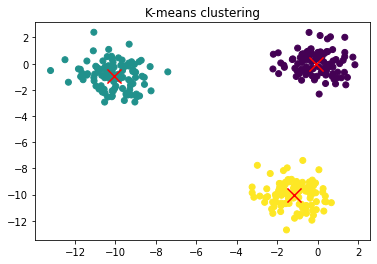

In [19]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 3)
k_means = k_means.fit(X)
clusters = k_means.predict(X)
sklearn_sscore = silhouette_score(X, clusters)
print(sklearn_sscore)

plt.scatter(X[:,0], X[:,1], c = clusters)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], color='red', marker='x', s=200)
plt.title('K-means clustering')
plt.show()

In [20]:
class KMeans:
    def __init__(self, n_clusters):
        # гиперпараметр - количество кластеров
        self.n_clusters = n_clusters
        
    def fit(self, X, max_iter=10, visualize=False):
        """
        INPUT:
        X - np.array, (n_objects x n_features) - матрица объекты-признаки
        max_iter - int - максимальное число итераций
        visualize - bool - визуализировать ли объекты и центры кластеров на каждой итерации 
        """
        # Цель: обучить центры кластеров self.centers, форма: число кластеров x число признаков
        
        # Шаг 1: сколько объектов и признаков?
        num_obj, num_feat = X.shape
        
        # Шаг 2: инициализируйте y - вектор длины n_objects, 
        # хранящий, к какому кластеру относится каждый объект
        # каждый элемент - случайно выбранный номер кластера 
        y = np.random.choice(range(self.n_clusters), num_obj)
        
        # Шаг 3: создайте матрицу для хранения центров кластеров
        # создатим сразу self.n_clusters случайных центров, 
        # которые будут равномерно распределены согласно мин макс данных для каждой переменной
        self.centers = np.random.uniform(low=X.min(axis=0), high=X.max(axis=0), size=(self.n_clusters,num_feat))
        
        for n_iter in range(max_iter):
            # Шаг 4: обновите центры кластеров
            for cl in range(self.n_clusters):
                self.centers[cl] = X[y==cl].sum(axis=0) / (len(X[y==cl]) + np.random.normal(loc=0.0, scale=10**-6))
            
            # Шаг 5: обновите y. Для этого вычислите расстояния между всеми объектами 
            # и центрами кластеров (используйте pairwise_distances), 
            # затем найдите ближайший к каждому объекту кластер
            
            y = compute_clusters(X, self.centers)
            
            # Поддержка флага visualize
            if visualize:
                plt.figure(figsize=(5,5))
                plt.scatter(X[:, 0], X[:, 1], c=y)
                plt.scatter(self.centers[:, 0], self.centers[:, 1], c='red', marker='x')
                plt.title('Step {}'.format(n_iter + 1))
                plt.show()
    
    def transform(self, X):
        """
        INPUT:
        X - np.array, (n_objects x n_features) - матрица объекты-признаки
        
        OUTPUT:
        y_pred - np.array, (n_objects,) - вектор, состоящий из меток кластеров (0, 1, ..., self.n_clusters-1), где
    на i-ом месте стоит метка кластера для i-ого объекта выборки X
        """        
        y_pred = compute_clusters(X, self.centers)
        return y_pred

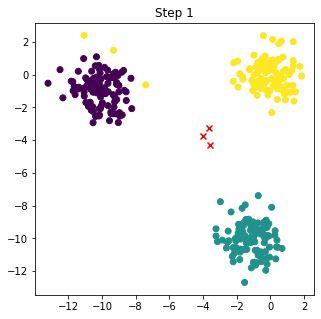

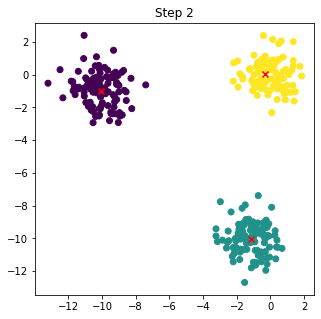

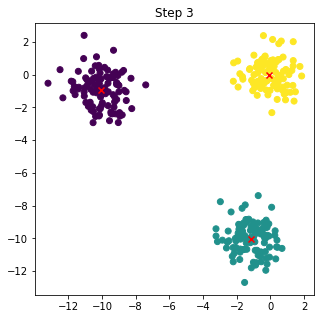

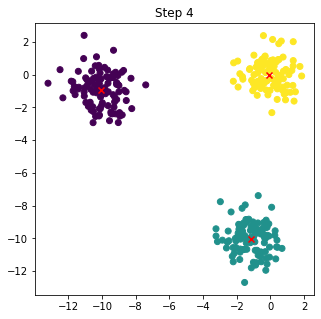

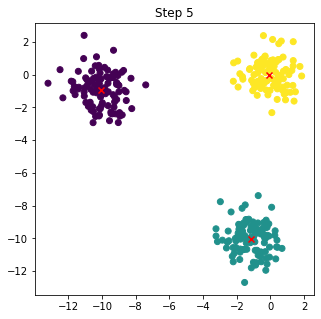

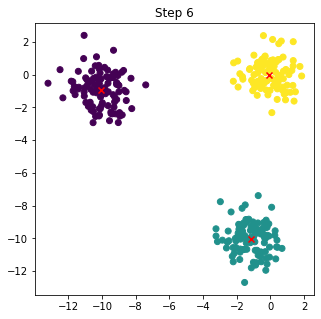

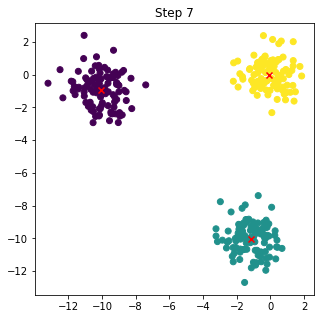

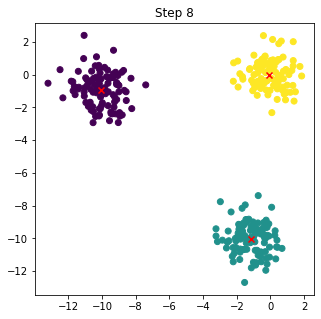

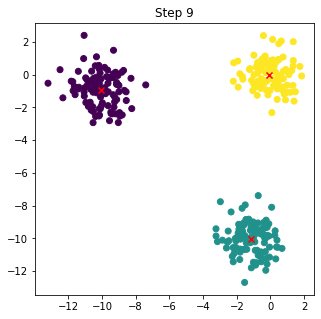

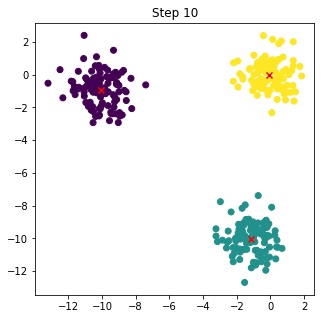

In [21]:
km = KMeans(3)
km.fit(X, visualize=True)
y = km.transform(X)

Итоговая кластеризация:

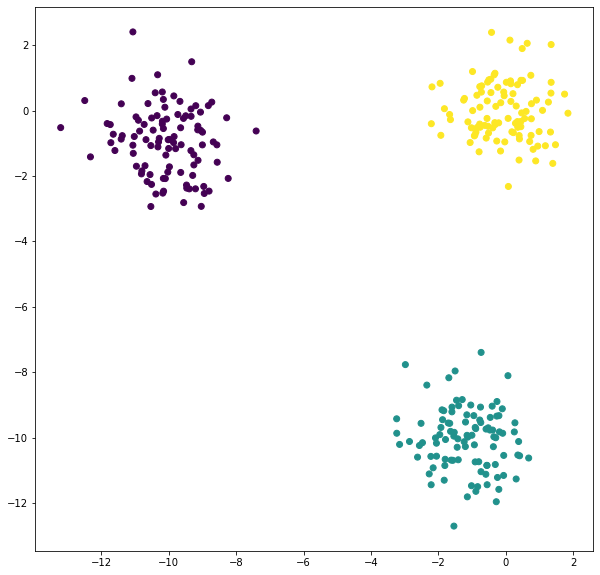

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [23]:
print(f'мы получили silhouette score: {silhouette_score(X, y)} при том что sklearn реализация выдавала {sklearn_sscore} - одинаковый результат')



мы получили silhouette score: 0.8316712767914036 при том что sklearn реализация выдавала 0.8316712767914036 - одинаковый результат


# Часть 3. Снижение размерности и Кластеризация

Мы будем работать с набором данных [Samsung Human Activity Recognition](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones). Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3, также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице.

Представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей только на основе имеющихся данных акселератора.

In [24]:
X = pd.read_csv('samsung_data.csv')
y = pd.read_csv('samsung_labels.csv')

In [25]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [26]:
np.unique(y)

array([1, 2, 3, 4, 5, 6], dtype=int64)

Эти метки соответствуют:

1 - ходьбе,
2 - подъему вверх по лестнице,
3 - спуску по лестнице,
4 - сидению,
5 - стоянию,
6 - лежанию

### Задание 1 [1 балл] <a id="task3_1"></a>

Отмасштабируйте выборку с помощью StandardScaler. 

Импортируем скейлер и проводим масштабирование

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sscaler = StandardScaler()
sscaler.fit(X)
X_scaled = sscaler.transform(X)
X_scaled

array([[ 2.10533854e-01, -6.87026385e-02, -4.52194533e-01, ...,
        -6.74432366e-01,  3.82007658e-01, -1.61505480e-02],
       [ 6.02084832e-02,  3.59023537e-02, -2.75221885e-01, ...,
        -6.81359801e-01,  3.83147865e-01, -1.20627169e-04],
       [ 7.84597052e-02, -4.64269585e-02, -8.55480582e-02, ...,
        -6.89470939e-01,  3.84288531e-01,  1.92144041e-02],
       ...,
       [ 1.11821625e+00,  1.28805864e+00, -1.29414692e-01, ...,
        -3.10750224e-01,  6.91509049e-01,  8.75719123e-01],
       [-5.43492722e-01,  9.75327452e-01,  2.34319837e-01, ...,
        -3.19283719e-01,  6.59762215e-01,  8.99444350e-01],
       [-1.78515253e+00, -1.86663622e-02, -5.29759691e-01, ...,
        -3.19991245e-01,  6.56994458e-01,  9.01454465e-01]])

In [36]:
np.mean(X_scaled, axis=0)[:10]

array([-2.38710347e-16,  3.57893042e-18, -3.09599041e-16, -1.72478575e-16,
       -2.41125047e-16, -3.86352007e-17, -1.82137375e-16, -9.31384303e-17,
        2.81485034e-16,  3.86352007e-17])

Ожидаемо получили среднее теперь уровня $10^{-17}$

### Задание 2 [1 балл] <a id="task3_2"></a>

Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Используйте отмасштабированную выборку и зафиксируйте random_state.

**Hint:** Напомним, что у PCA есть атрибут `explained_variance_ratio_`

In [37]:
movement_pca = PCA(random_state=80085)
movement_pca.fit(X_scaled)

# сделаем перебор N, чтобы найти нужное число
n_pca = 1
explained_sum = 0
for i in range(len(movement_pca.explained_variance_ratio_)+1):
    cursum = sum(movement_pca.explained_variance_ratio_[:i])
    if cursum > 0.9:
        explained_sum = cursum
        n_pca = i
        break
print(f'Число главных компонент :{n_pca}, объясняют {explained_sum} дисперсии')


Число главных компонент :65, объясняют 0.9004833346822935 дисперсии


### Задание 3 [1 балл] <a id="task3_3"></a>


Визуализируйте данные (scatter plot) в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с настоящими классами (`y`).

In [39]:
y

,0
0,5
1,5
2,5
3,5
4,5
...,...
10294,2
10295,2
10296,2
10297,2


In [42]:
movement_transformed[:,0].shape

(10299,)

In [47]:
y['0']

0        5
1        5
2        5
3        5
4        5
        ..
10294    2
10295    2
10296    2
10297    2
10298    2
Name: 0, Length: 10299, dtype: int64

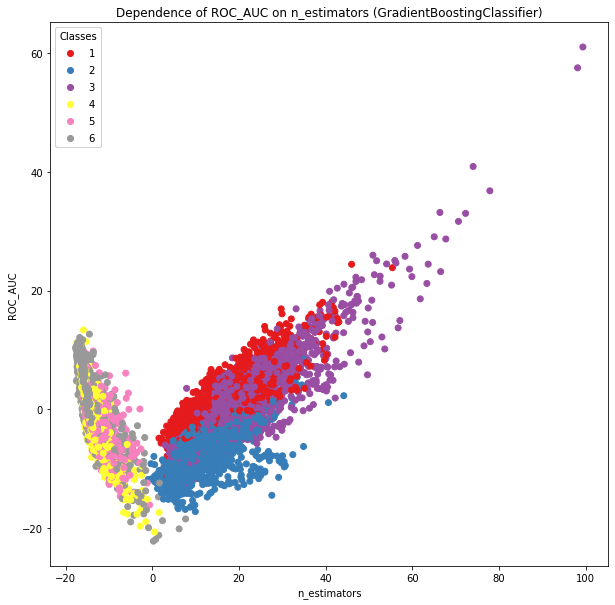

In [66]:
movement_transformed = movement_pca.transform(X_scaled)


fig, ax = plt.subplots(figsize=(10,10))

scatter = ax.scatter(movement_transformed[:,0], movement_transformed[:,1], c=y['0'], cmap="Set1")

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend1)
plt.title('Dependence of ROC_AUC on n_estimators (GradientBoostingClassifier)')
plt.xlabel('n_estimators')
plt.ylabel('ROC_AUC')
plt.show()

### Задание 4 [1 балл] <a id="task3_4"></a>


Сделайте кластеризацию данных методом KMeans, обучив модель на данных со сниженной за счет PCA размерностью. В данном случае нужно искать 6 кластеров (так как у нас 6 классов). 

Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

In [19]:
# your code here

### Задание 5 [2 балла] <a id="task3_5"></a>


Сделайте кластеризацию данных методом DBSCAN. Подберите гипераметры `eps` и `min_samples` максимизируя метрику `silhouette_score`. Обучайте модель на данных со сниженной за счет PCA размерностью. Ваша цель получить модель с `silhouette_score` 0.47 или больше.

Сравните лучшую модель c k-means в терминать `silhouette_score`.

In [227]:
# YOUR CODE HERE

In [ ]:
# YOUR CODE HERE: score for the best DBSCAN MODEL

In [ ]:
# YOUR CODE HERE: score for the  k-means MODEL